### Linear Regression on height_weight_gender data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Implement function linear_regression_data that computes the linear regression data matrix.

In [4]:
def linear_regression_data(inputs):
    col=np.ones((len(inputs), 1))
    mat=np.c_[col,inputs]
    return mat

In [5]:
inputs = np.array([[4], [3], [5], [7]])
linear_regression_data(inputs)

array([[1., 4.],
       [1., 3.],
       [1., 5.],
       [1., 7.]])

Function **linear_regression** computes and returns the solution $\hat{\mathbf{W}}$ of the normal equation
$
\mathbf{X}^{\top}\mathbf{X} \hat{\mathbf{W}} = \mathbf{X}^{\top}\mathbf{Y}
$

In [6]:
def linear_regression(data_matrix, data_outputs):
    X=data_matrix
    Y=data_outputs
    return np.linalg.solve(X.T@X,X.T@Y)

In [7]:
test_matrix = np.array([[1,0.5],[1,1.5]])
test_outputs = np.array([[1],[1]])
linear_regression(test_matrix, test_outputs)

array([[1.],
       [0.]])

Function **prediction_function** evaluates the predicted linear function for given weights.

In [8]:
def prediction_function(data_input, weights):
    return linear_regression_data(data_input)@weights

In [9]:
test_input = np.array([1])
test_weights = np.array([[1],[1]])
prediction_function(test_input, test_weights)

array([[2.]])

Function **prediction_error** evaluates a mean-squared error over the set of data inputs and outputs

In [12]:
def prediction_error(data_matrix,data_outputs,weights):
    X=data_matrix
    Y=data_outputs
    W=weights
    Squared=(np.linalg.norm(X@W-Y))**2
    MSE=Squared/(2*len(Y))
    return MSE

In [13]:
test_data_matrix = np.array([[1,1,-1],[1,2,2]])
test_data_outputs = np.array([[-1,2],[1,3]])
test_weights = np.array([[0,0],[1,2],[3,4]])
prediction_error(test_data_matrix, test_data_outputs, test_weights)

36.75

Using the gender_height_weight data,  build a linear regression for a weight as a function of height.

In [14]:
genders = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[0], \
                        converters={0: lambda x: 0 if b"Male" in x else 1})
heights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[1])
weights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[2])

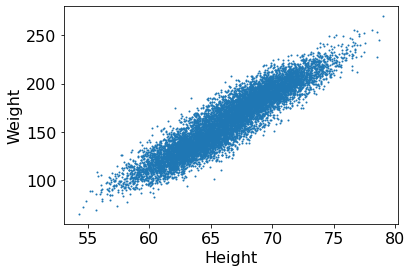

In [16]:
#Scatter plot for weight-height data

plt.scatter(heights, weights, s = 1)
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

In [18]:
data_matrix = linear_regression_data(heights)
regression_weights = linear_regression(data_matrix, weights)
regression_weights

array([-350.73719181,    7.71728764])

In [19]:
training_error = prediction_error(data_matrix, weights, regression_weights)
training_error

74.6467419745648

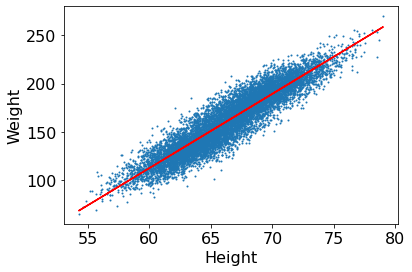

In [20]:
#plot linear regression line in the scatter plot
plt.scatter(heights, weights, s = 1)
m,b=np.polyfit(heights,weights,1)
plt.plot(heights,m*heights+b,color='red')
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;